![header](https://raw.githubusercontent.com/AdrianoPereira/project-cap394/master/assets/images/header-pt.png)

## Preprocessamento de dados provenientes da telemetria de um satélite geostacionário
---
**Professores:**
- Dr. Gilberto Queiroz
- Dr. Rafael Santos

**Discente:**
- Adriano Almeida

**Aluno:**
- Marcio Waldir Silva Junior

## Motivação

Este projeto faz parte do trabalho final da disciplina **CAP-394 - Introdução à *DataScience*** que é oferecida no programa de pós graduação em computação aplicada do Instituto Nacional de Pesquisas Espaciais (INPE) e ministradas pelos professores [Dr. Rafael Santos](http://www.lac.inpe.br/~rafael.santos/) e [Dr. Gilberto Queiroz](http://www.dpi.inpe.br/~gribeiro/doku.php). O trabalho tem como principal objetivo analizar dados provenientes de sinais de telemetria de um satélite geostacionario e assim tentar responder as seguintes questões: 


**1 - Os valores tendem a algum comportamento padrão?**


**2 - Como essas telemtrias evoluem ao longo do tempo?**


**3 - Existem outliers ou valores anômalos?**


**4 - É possivel atraves da analise do comportamento das telemetrias, inferir de maneira aproximada o contexto do satélite?**


**5 - É possível inferir alguma correlação entre as Telemetrias?**


## 1. Introdução

Os satélites artificiais normalmente prestam serviços importantes em comunicação, sensoriamento remoto, experimentos científicos, etc. Danos aos satélites implicam não apenas numa perda financeira, mas também a perda de serviços essenciais e, às vezes, estratégicos. Com o objetivo de monitorar o satélite, cada subsistema possui um conjunto de sensores (termistores, interruptores, esgotamento da bateria, etc.) para medir o estado e as condições do satélite. Essas medições são transmitidas às estações terrestres em cada passagem de satélite e são comumente chamadas de dados de telemetria de manutenção. Atualmente satélites de maior porte feitos pelo INPE possuem um grande número de telemetrias e telecomandos, que são recebidos em tempo real e analisados por especialistas e operadores, constituindo a principal fonte de identificação e predição de anomalias em satélites artificiais, entretanto, o grande numero de telemetrias torna tal analise extremamente complexa e laboriosa. Nesse cenário, pode ser difícil executar a detecção, diagnóstico e prevenção precoces de anomalias e falhas, o que promove menor confiabilidade e disponibilidade dos sistemas espaciais, diminuição da vida útil e da continuidade do serviço. Portanto, este trabalho propõe o uso de uma abordagem de Data science para permitir uma análise bem-sucedida, e menos laboriosa, de dados de Telemetria armazenados em tempo real para ajudar no trabalho de especialistas e operadores de subsistemas. O satélite utilizado como estudo de caso deste trabalho trata-se de um satélite geostacionario para observação de recursos terrestres e será doravantemente denominado ANSAT.

### 1.1 Características das  anomalias em satélites e detecção
Detectar anomalias refere-se a encontrar nos dados padrões que não estão em conformidade com uma noção bem definida de comportamento normal [8]. Essa área de pesquisa apresenta um conjunto importante de desafios, entre eles, a disponibilidade de dados históricos, a definição do que são padrões normais e anômalos e, inclusive, a consideração de que em muitos domínios a noção de normalidade pode evoluir.

Na prática, o objetivo é avaliar a possibilidade de detectar anomalias de satélite, analisando dados de telemetria usando algoritmos de inteligência artificial. Nesta linha, pode-se dizer que um dos principais problemas associados à detecção automática de anomalias é a própria caracterização do problema a ser tratado, ou seja, identificar as características do domínio do problema e os dados disponíveis e, através dessa identificação, determinar quais seriam as técnicas mais adequadas [1].

Os dados de telemetria são analisados e monitorados por operadores e analistas humanos, principalmente para avaliar se os valores não estão fora de um intervalo ou padrão predefinido. Valores fora do intervalo geralmente indicam uma anomalia em potencial em um subsistema de satélite específico, mas a grande quantidade de dados de telemetria torna quase impossível uma análise cuidadosa e detalhada em tempo real. Este trabalho utiliza técnicas tradicionais de ciência de dados em dados de telemetria para tentar ajudar operadores e analistas a realizar análises de telemetria para ver sua distribuição e seus valores extremos.


### 1.2 Ferramentas e abordagens de Data science
O processo de data science pode ser visto como um fluxo iterativo de processos [2], que tende a nos levar a um refinamento das informações e, no final, a _insights_. Estes nos permitem ter uma idéia de qual algoritmo poderia ser usado para detectar o comportamento de interesse. Antes de começar a falar sobre as ferramentas e a própria linguagem de programação, a Figura 1 mostra a estrutura básica seguida neste trabalho.

|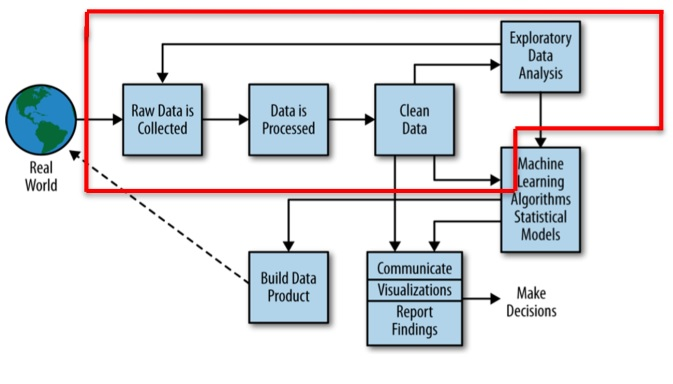 | 
|:--:| 
| *Figure 1. Used data science workflow (in red) adapted from [2] Source: the book Doing Data Science from Rachel Schutt & Cathy O´Neil*  |

Este trabalho fez um esforço para fluir através de todos os processos contidos dentro da borda vermelha da Figura 1. Talvez mais algumas iterações possam ser feitas, mas no momento o resultado é bastante satisfatório para cumprir nossos primeiros objetivos.

#### 1.2.1 Ferramentas e Linguagem de programação
Com relação ao ambiente de suporte de programação adotado para este trabalho, a Figura 2 mostra os componentes do framework Anaconda [3] e como eles estão relacionados à abordagem aqui adotada. A maioria das ferramentas e linguagens de programação aqui adotadas foram escolhidas devido à sua característica de serem intuitivas, amigáveis, faceis de utilizar e de grande disponibilidade de  repositório para consulta, o que se traduz na oportunidade de gastar nossos esforços na análise dos dados propriamente dita, e não no desenvolvimento das ferramentas para realizar a analise. A plataforma Anaconda também funciona com outros ambientes de desenvolvimento, e até mesmo para diferentes linguagens como R, por isso é muito versátil.

| 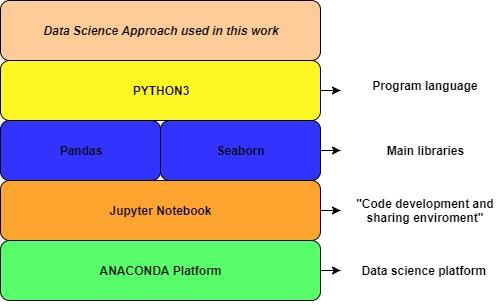 | 
|:--:| 
| *Figure 2. ANACONDA framework for this work´s application development* |

O desenvolvimento deste trabalho foi realizado inteiramente através da ferramenta Jupyter Notebook. Este é um aplicativo da web de código aberto que permite criar e compartilhar documentos que contêm código ativo, equações, visualizações e texto narrativo. Os usos incluem: limpeza e transformação de dados, modelagem estatística, visualização de dados e muito mais. Ele oferece a opção de trabalhar diretamente on-line ou usar a versão instalada no PC, que foi a opção neste trabalho, apesar de eles funcionarem exatamente da mesma maneira. Como linguagem de programação para analisar e trabalhar os dados, duas linguagens de programação diferentes poderiam ser usadas, R e Python, mas devido à maior afinidade do autor, o Python foi escolhido como a linguagem a ser usada no desenvolvimento deste trabalho. O Python não é uma linguagem com "propósito único", pois pode trabalhar com várias bibliotecas diferentes para fins de diferentes. Possui uma sintaxe fácil de entender e tem o benefício de que o desenvolvedor pode se concentrar no foco principal de seu trabalho, em vez de precisar lidar com muitas regras e notações sintáticas, o que facilita a implementação e alteração de um script para uma função específica em seu código. Como biblioteca principal para apoiar a tarefa de lidar com a preparação de dados, foi escolhida a biblioteca Pandas. O Pandas é uma biblioteca de código aberto, licenciada por BSD, que fornece estruturas de dados fáceis de usar e ferramentas de análise de dados para a linguagem de programação Python. Facilita a tarefa de lidar com a massa de dados csv, a fim de obter dados organizados durante a preparação dos dados, além de facilitar a análise e a visualização. O Pandas trabalha com o Seaborn, que é uma biblioteca de visualização de dados Python baseada no matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. É preciso ressaltar que, devido à falta de compatibilidade entre as versões, o trabalho foi realizado usando a versão 3 do Python, dado que é cada vez mais recorrente as bibliotecas construídas para trabalhar com a versão 2 do Python percam o suporte, e como o objetivo do trabalho é trabalhar com os dados, é imprescindível que durante o desenvolvimento o esforço seja gasto na analise destes e não na soluções de bugs provenientes da falta de dependências de bibliotecas entre outros problemas que o uso de "bibliotecas descontinuadas" podem acarretar.

 Mais detalhes sobre cada um dos módulos da estrutura utilizada podem ser encontrados extensivamente em [3], bem como em aplicações de Python para Data Science em [4].

### 1.3 Estudo de caso

Este trabalho utilizará dados de telemetria do ANSAT que correspondem a aquisições de telemetria realizadas em 2000 e 2003. A primeira janela de tempo a ser analisada é sobre janeiro de ambos os anos e a segunda janela é um período entre 1 e 16 de março de 2000 e 2003. Há também uma janela de tempo para o mês de junho de 2003 que pode ser avaliada. Graças a trabalhos anteriores, é sabido que este satélite apresenta problemas no seu sistema de suprimento de energia que pode ser percebido durante os períodos de captura de telemetria aqui utilizados. O subsistema de energia é responsável por gerar e condicionar a energia primária do satélite (painéis solares), armazenar energia em fontes secundárias (baterias) e fornecer energia a outros subsistemas em tensões diferentes. É evidente que o estudo de soluções que atendem a mitigação, ou até soluções alternativas, dos problemas que um satélite pode exibir durante sua missão são de extrema relevância, porém, um foco na solução de problemas relacionados ao sistema de suprimento de energia pode ser embasada de acordo com as estatísticas apresentadas em dois artigos diferentes que estudaram falhas em satélites [13] [14], é um dos subsistemas mais críticos em um satélite. Nos dois estudos, o subsistema de energia foi responsável por uma porcentagem considerável de falhas ocorridas: 27% [13] e 22% [14].
Neste experimento, foram usadas apenas telemetrias analógicas que indicaram medidas de interesse para o subsistema de fornecimento de energia, especialmente aquelas associadas a baterias, painéis solares, equipamentos SHUNT e BDR. Uma representação em diagrama de blocos do subsistema de energia é mostrada na figura 3

| 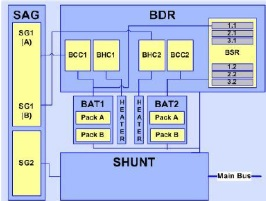 | 
|:--:| 
| *Figure 3. Satellite power management subsystem high abstraction level block diagram* |

Essas telemetrias foram escolhidas porque são as mais representativas do comportamento do subsistema de energia e, portanto, têm maior potencial para identificar problemas e anomalias. A Tabela 1 lista as telemetrias usadas no experimento, mas não apenas a descrição de cada sinal de telemetria, mas também os valores-limite nos quais cada sinal deve estar.

<table style="width: 50%; margin: 30; padding: 0; border: 0;">
    <caption>Tabela 1 - Telemetrias do Subsistema de Potência</caption>
    <tr>
        <th style="text-align: center; border: 1px solid black">Telemetria</th>
        <th style="text-align: center; border: 1px solid black">Descrição</th>
        <th style="text-align: center; border: 1px solid black">Limites</th>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM001</td>
        <td style="text-align: center; border: 1px solid black">Tensão do Barramento Principal.</td>
        <td style="text-align: center; border: 1px solid black">27 a 29V</td>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM002</td>
        <td style="text-align: center; border: 1px solid black">Corrente do Barramento Principal.</td>
        <td style="text-align: center; border: 1px solid black">0 a 36A</td>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM003</td>
        <td style="text-align: center; border: 1px solid black">Tensão de saída do Main Error Amplifier(MEAS)</td>
        <td style="text-align: center; border: 1px solid black">8 a 23.5V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM013/017</td>
        <td style="text-align: center; border: 1px solid black">Corrente de entrada do BDR</td>
        <td style="text-align: center; border: 1px solid black">0 a 13A</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM014/018</td>
        <td style="text-align: center; border: 1px solid black">Tensão das baterias</td>
        <td style="text-align: center; border: 1px solid black">43.2 a 56.5V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM015/019</td>
        <td style="text-align: center; border: 1px solid black">Temperatura das baterias</td>
        <td style="text-align: center; border: 1px solid black">0 a 10°C</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM016/020</td>
        <td style="text-align: center; border: 1px solid black">Tensão mínima de grupo de 3 células</td>
        <td style="text-align: center; border: 1px solid black">3.6 a 4.65V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM021</td>
        <td style="text-align: center; border: 1px solid black">Corrente de saída do BDR</td>
        <td style="text-align: center; border: 1px solid black">0 a 36A</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM022/023</td>
        <td style="text-align: center; border: 1px solid black">Corrente dos painéis solares (SG1 e SG2)</td>
        <td style="text-align: center; border: 1px solid black">0 a 7.2A</td>
    </tr>
</table>

No entanto, a massa de dados de telemetria a ser utilizada neste artigo apresenta todo o espectro de sinais de telemetria disponíveis na janela de aquisição naquele momento, devido a isso, a preparação dos dados foi necessária.

## 2. Desenvolvimento

Neste seção, serão descritas as etapas utilizadas no desenvolvimento deste trabalho.

### 2.1 Preparação dos dados
A preparação de dados não é apenas um primeiro passo, mas deve ser repetida várias vezes ao longo da análise, à medida que novos problemas surgem ou novos dados são coletados[9].Como mencionado anteriormente, a massa de dados da telemetria contem  apresenta todo o espectro de sinais de telemetria disponíveis na janela de aquisição o que torna o espectro mais amplo do que o objetivo da analise do trabalho. Devido a isto , o objetivo nesse momento é obter um data set arranjado em um matriz de maneira que cada variável seja representada numa coluna diferente e cada observação do dado seja um linha diferente, formato conhecido como tidy data, conforme definido por Hadley Wickham . Tal formato visa colocar a informação em uma condição melhor para se realizar a exploração e analise destes. A massa de dados de telemetria foi fornecida em formato .csv (comma separated value), e dividida em arquivos diferentes de modo que cada arquivo . csv representa uma janela de observação de um determinado mês em um determinado ano. Quando é dito que a massa de dados foi armazenada em formato .csv significa que sem o uso de um interpretador de tal formato, ao olharmos para uma fatia destes veremos algo do tipo: 

OBTIME,TMD001,TMD002,TMD003,TMD004,TMD005,TMD006,TMD007,TMD008,TMD009,TMD010,TMD011,TMD012,TMD013,TMD014,TMD015,TMD016,
TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023,TMD024,TMD025,TMD026,TMD027,TMD028,TMD029,TMD031,TMD032,TMD033,TMD034,
TMD035,TMD036,TMD038,TMD039,TMD040,TMD041,TMD042,TMD044,TMD045,TMD046,TMD047,TMD048,TMD049,TMD050,TMD051,TMD052,TMD053,
TMD054,TMD055,TMD056,TMD057,TMD058,TMD059,TMD060,TMD061 01-01-2000 03:04:29.856,      28.2,      18.8,        13,0,0,1,0,1,1,0,1,0,       6.5,      48.2,      1.64,      4.07,      7.31,      47.6,      2.42,      4.05,    -0.373,    0.0805,      8.28,      5.28,      12.1,     -11.9,      5.05,      28.4,0,      12.1,      27.1,      5.34,      12.2,       -12,0,      5.49,     -5.75,        12,     -11.9,0,        20,      27.1,       -20,      35.1,0,     0.015,      5.02,     0.064,     0.037,     -12.1,      16.8,      7.88,,,      5.12,,,,,,,,,        12,     -12.1,,      5.02,        15, 
-14.9,      12.1,     -12.1,0,      5.47,      12.1,      15.1,    -14.9,0,      5.15,     -5.26,     -19.7,      12.1,      8.25,0,0,0,0,0,0,0,0,0,0,,0,,0,,,,0,0,0,0,0,0,0,0,0

Para importarmos os dados provenientes dessa fonte e coloca-los num formato Pandas DataFrame foi utilizado a função ‘read_csv’,  proveniente da biblioteca Pandas, que disponibiliza uma série de diferentes funcionalidades, mas aqui foi apenas utilizado para exportar a massa de dados que se encontrar num caminho dentro do pc utilizado no estudo. O Pandas DataFrame é uma estrutura de dados tabular bidimensional, mutável em tamanho e potencialmente heterogênea, com eixos rotulados (linhas e colunas). As operações aritméticas são alinhadas nos rótulos de linha e coluna. Pode ser pensado como um contêiner do tipo dicionário para objetos da série. A função nos retornos de dados organizados em um dataframe-tidy, conforme visto nas células abaixo



### Nota:
Este arquivo csv corresponde aos dados de algumas Telemetrias do CBERS1 colhidas durante todo o mesmo de janeiro de 2000

In [84]:
import pandas as pd
rawData = pd.read_csv('rawData/ANSAT/01jan2000_a_31jan2000_vi.csv')
rawData.head()
##Atividade a ser realizada a posteriori: Entender porque o Excel separa os dados por ; ao inves de , quando é selecionado a opção de salvar no modo CSV.
##Pois, este pequeno detalhe impede que a função read_csv do Pandas consiga gerar um DF(DataFrame) de um CSV.

,OBTIME,TMD001,TMD002,TMD003,TMD004,TMD005,TMD006,TMD007,TMD008,TMD009,...,TMD106,TMD107,TMD108,TMD109,TMD110,TMD111,TMD112,TMD113,TMD114,TMD115
0,01-01-2000 03:04:29.856,28.2,18.8,13.0,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
1,01-01-2000 03:05:22.289,28.1,18.1,13.2,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
2,01-01-2000 03:06:14.723,28.1,18.3,13.0,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
3,01-01-2000 12:22:38.359,28.1,12.4,13.1,1,1,0,0,0,0,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
4,01-01-2000 12:23:30.792,28.1,13.1,18.5,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0


Apesar de apresentar uma boa formatação, a massa de dados utilizada apresenta senais de telemetria que não serão levadas em consideração para o estudo realizado neste trabalho. Dado isso, esses dados serão eliminados do dataframe, deixando apenas os sinais evidenciados na tabela 1.

In [85]:
import matplotlib as mpl
mpl.__version__
import matplotlib.pyplot as plt
rawData = rawData[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
rawData.head()

,OBTIME,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,01-01-2000 03:04:29.856,28.2,18.8,13.0,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,01-01-2000 03:05:22.289,28.1,18.1,13.2,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,01-01-2000 03:06:14.723,28.1,18.3,13.0,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,01-01-2000 12:22:38.359,28.1,12.4,13.1,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,01-01-2000 12:23:30.792,28.1,13.1,18.5,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110


### Nota:
Os dados apresentados na coluna 1, OBTIME, referem-se a data e hora que o dado foi adquirido. A massa de dados será avaliada como um série temporal, independente da data e hora da aquisição. Sendo assim, seria interessante que esses dados também fossem eliminados da tabela

In [86]:
df = rawData
df.drop(columns=['OBTIME'])
df = df[ ["TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
df.head()

,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,28.2,18.8,13.0,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,28.1,18.1,13.2,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,28.1,18.3,13.0,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,28.1,12.4,13.1,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,28.1,13.1,18.5,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110


### 2.1 Analise dos dados

A decisão de não levar em consideração a variável que contém a hora e a data da aquisição foi tomada devido ao fato de que agora não estamos interessados em saber especificamente quando ocorreu uma anomalia ou outlier. Na verdade, estamos interessados, à primeira vista, em saber como os sinais de telemetria evoluem durante um mês. Com a ajuda da função lineplot da biblioteca Seaborn, é possível dar uma primeira olhada no comportamente dos sinais de telemetrias, apresentado no dataframe acime, através do gráfico de linhas visto abaixo

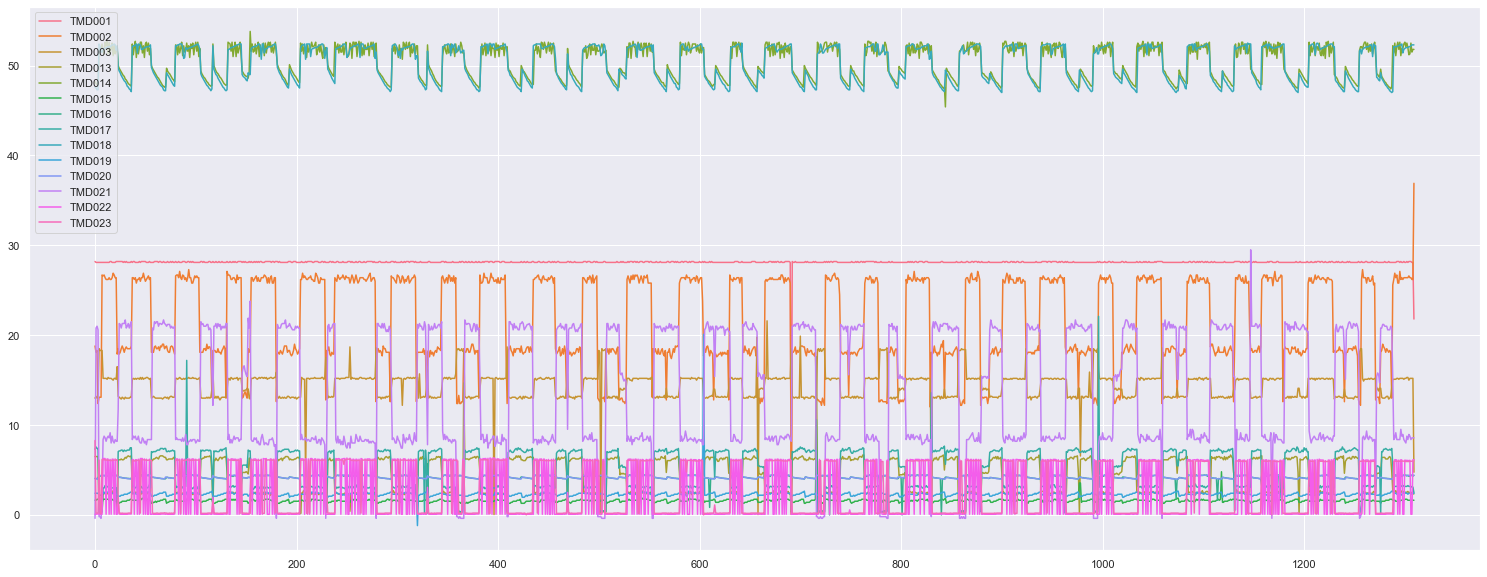

In [87]:
import seaborn as sns
plt.figure(figsize=(26, 10))
sns.lineplot(data=df, dashes=False)

### Nota:
*Para melhor vizualiar o comportamento dos sinais, uma diminuição na janela de tempo analisada será feito, e apenas parte do periodo será plotado no grafico. A escolha do período foi feita de maneira arbitraria.*

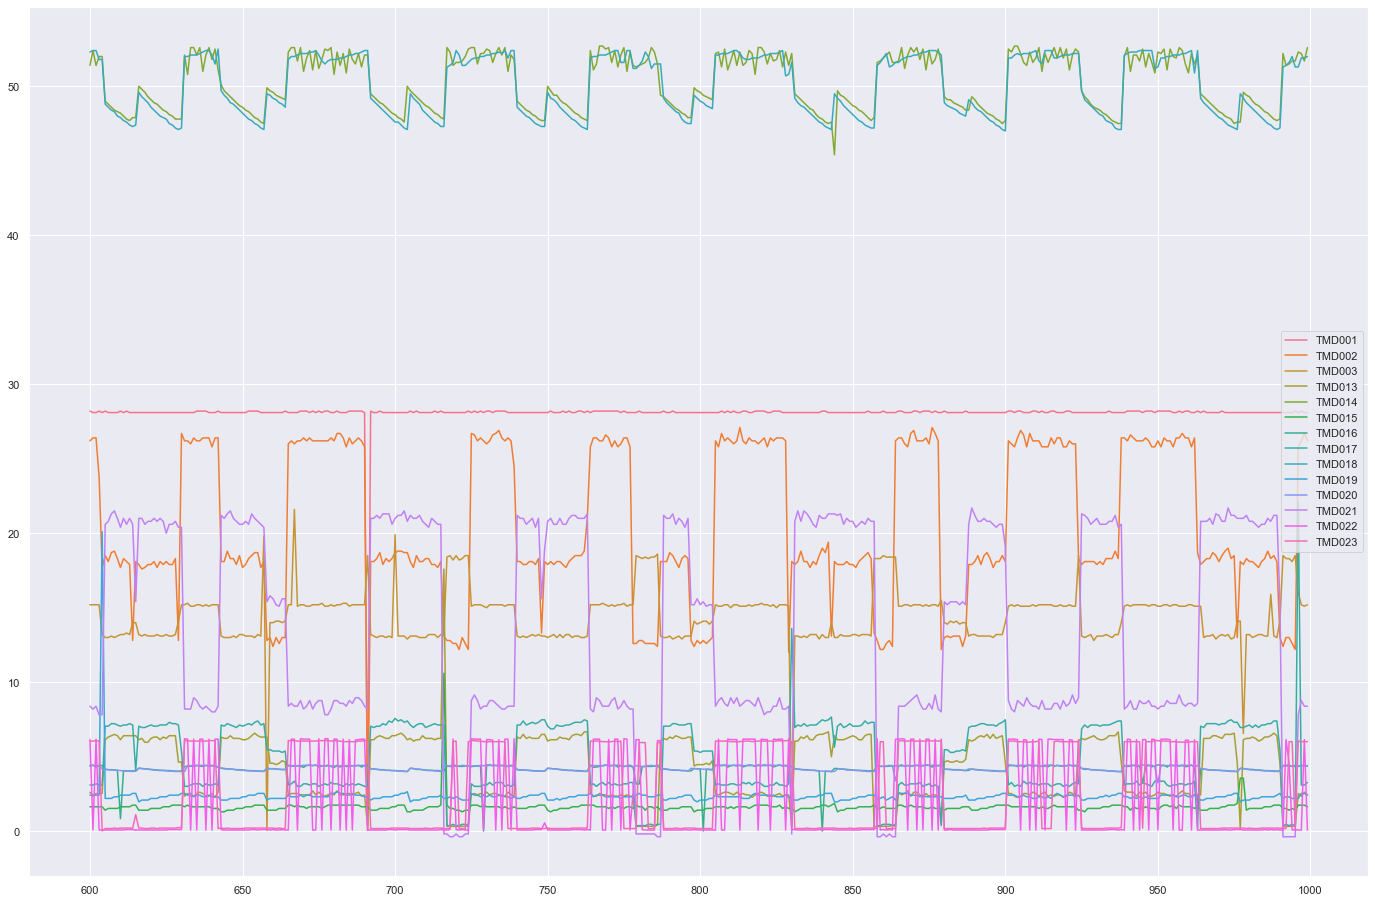

In [88]:
plt.figure(figsize=(24, 16))
sns.lineplot(data=df[600:1000], dashes=False)

Ainda que a escala do eixo Y misture diferentes tipos de grandezas físicas é possível observar na maioria dos sinais o comportamento cíclico das telemetrias, relacionado aos momentos de eclipse e visada do sol. Também é possivel identificar alguns picos em alguns sinais mas que nesse momento não dizem muito, mas ainda assim, num primeiro momento, é possivel inferir com parcial certeza de que as telemetrias TMD0014 e TMD0018, relativas as tesões da bateria se encontram dentro da faixa de velores de tensão esperado.A fim de ter uma melhor avaliação da variação dos valores de ambas os sinais de telemetria, podemos usar uma representação de dados chamadas boxplot, também suportado pelo Seaborn, que se trata de uma maneira padronizada de exibir a distribuição de dados com base em um resumo de cinco números (“mínimo”, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e “máximo”). Ele pode informar sobre seus valores discrepantes e quais são seus valores se seus dados forem simétricos, com que grau de agrupamento eles são dados e se e como seus dados são distorcidos. Um boxplot é um gráfico que fornece uma boa indicação de como os valores nos dados são distribuídos. A representação boxplot de TMD0014 e TMD0018 pode ser vista no plot abaixo.

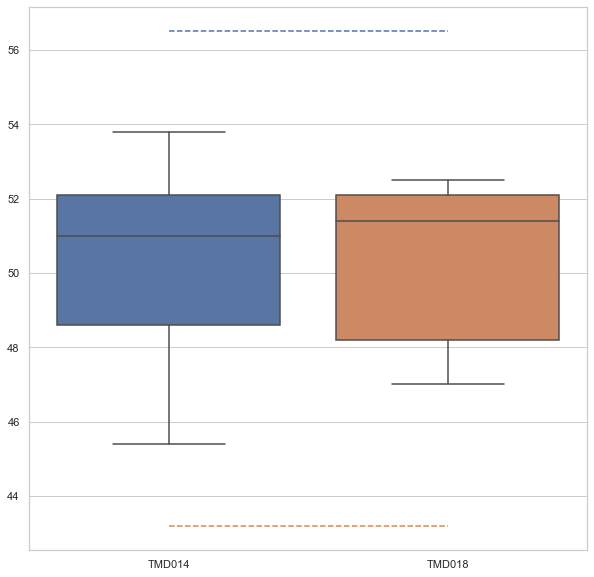

In [89]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.boxplot(data=df, order = ['TMD014','TMD018'])
plt.plot([0, 1], [56.5, 56.5],  ls='--')
plt.plot([0, 1], [43.2, 43.2],  ls='--')


### Nota:
*No plot acima, a linha azul tracejada indica o valor maximo permitido para tensão das baterias, e de maneira analoga, a linha laranja tracejada, o valor minimo permitido. Embora os valores de tensão destas tenham sido levemente diferentes quando comparados os valores máximos e mínimos, é possivel afirmar que o intervalo interquatil destas se manteve praticamente igual, apresentando uma distribuição muito parecida, além de nenhum outlier ter sido observado nessa janela de análise.*  

No plot dos sinais de telemetria feito anteriormente, onde pode se observar todos os sinais ao mesmo tempo numa janela de tempo é observado que a sobreposição do sinais causa uma dificuldade da vizualização correto destes, assim, foi feito o plot dos sinais de maneira separada afim de evitar a sobreposição destes. Os sinais foram oganização confome listados na tabela 1.

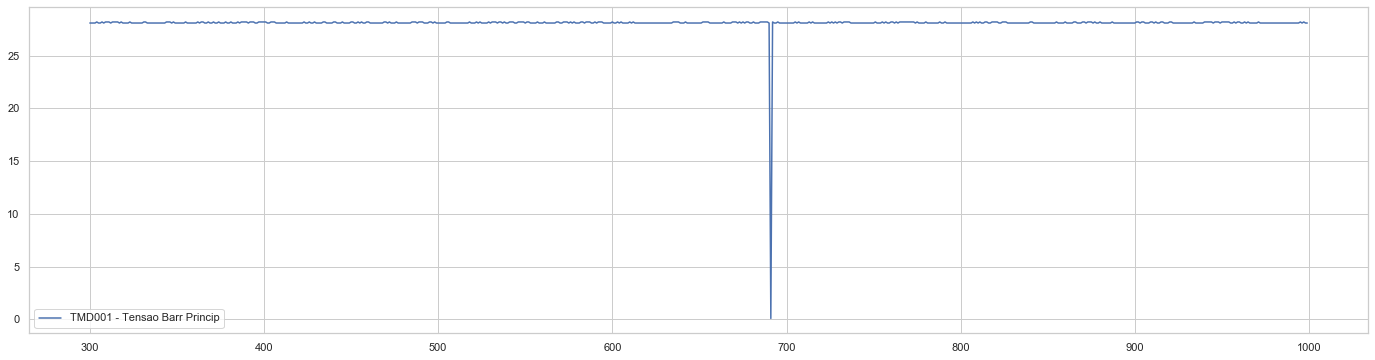

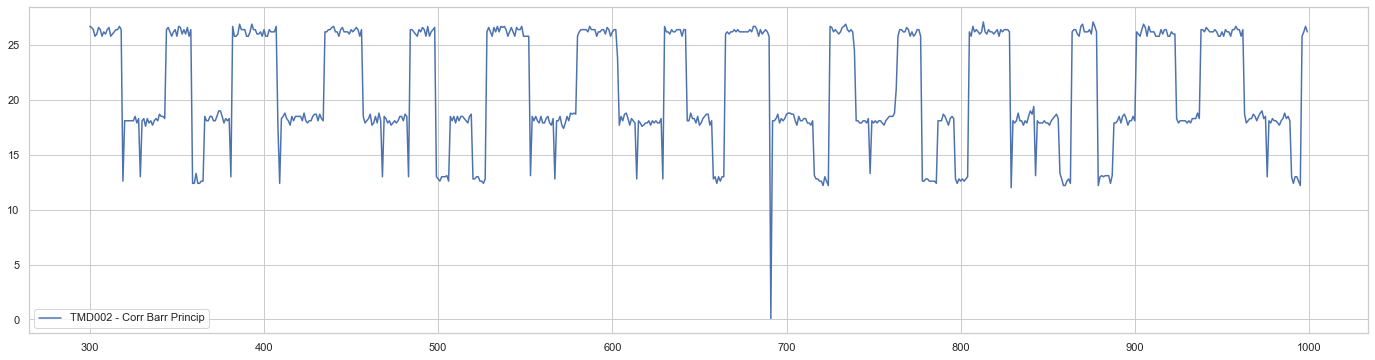

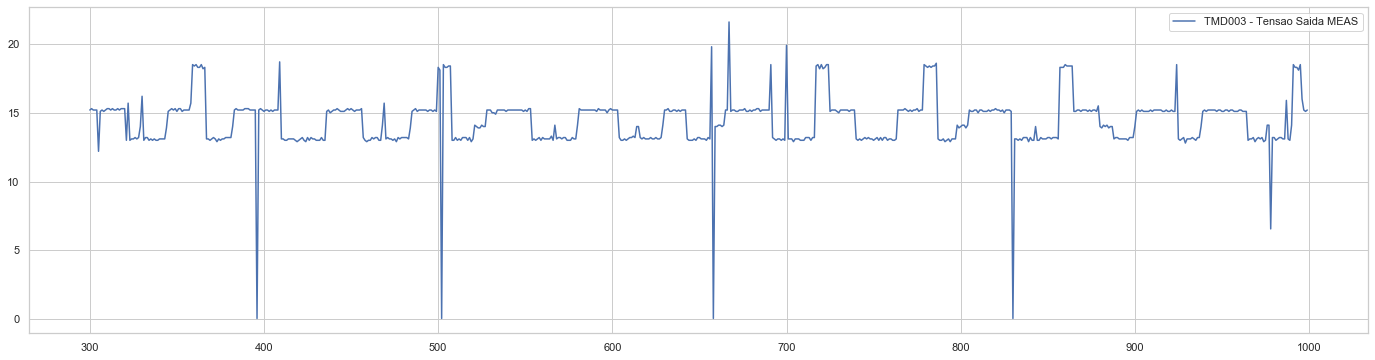

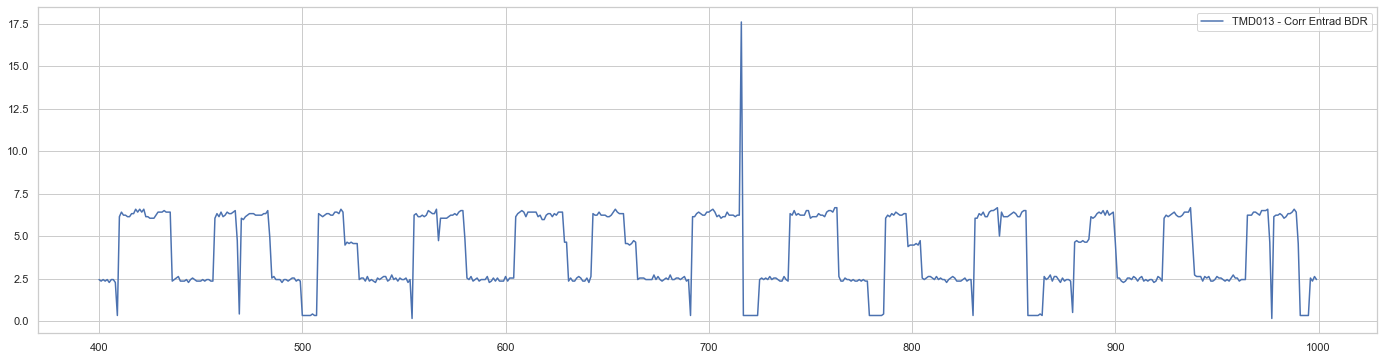

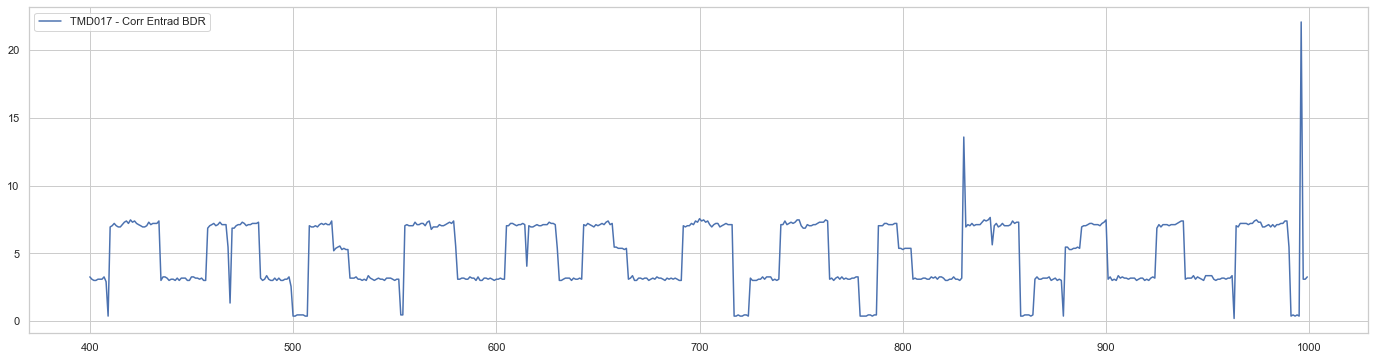

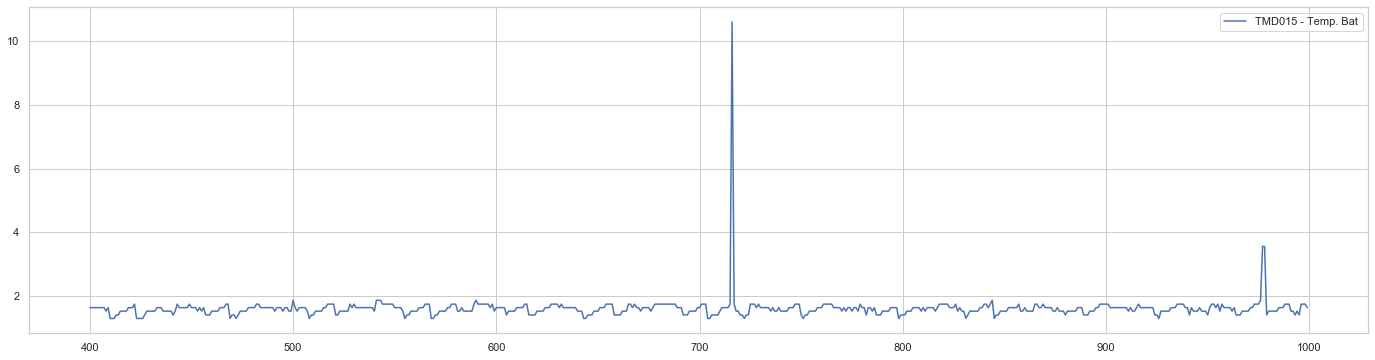

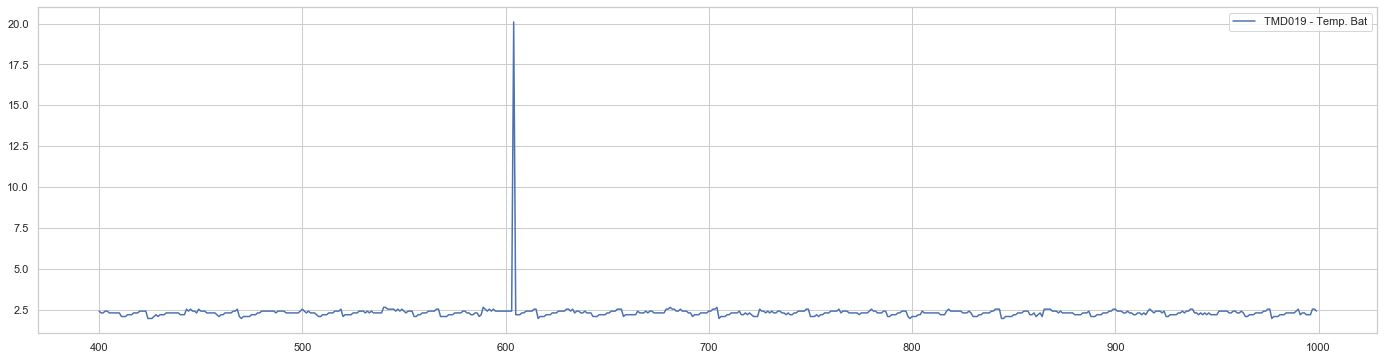

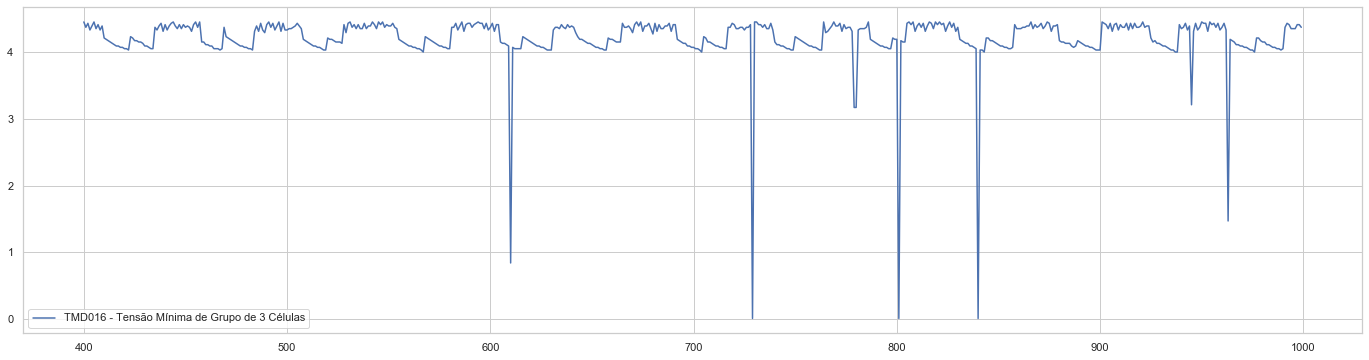

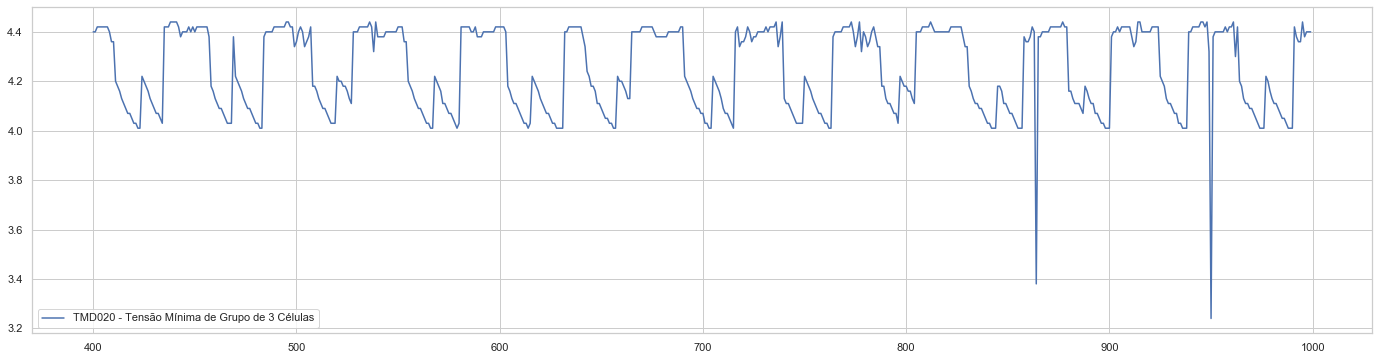

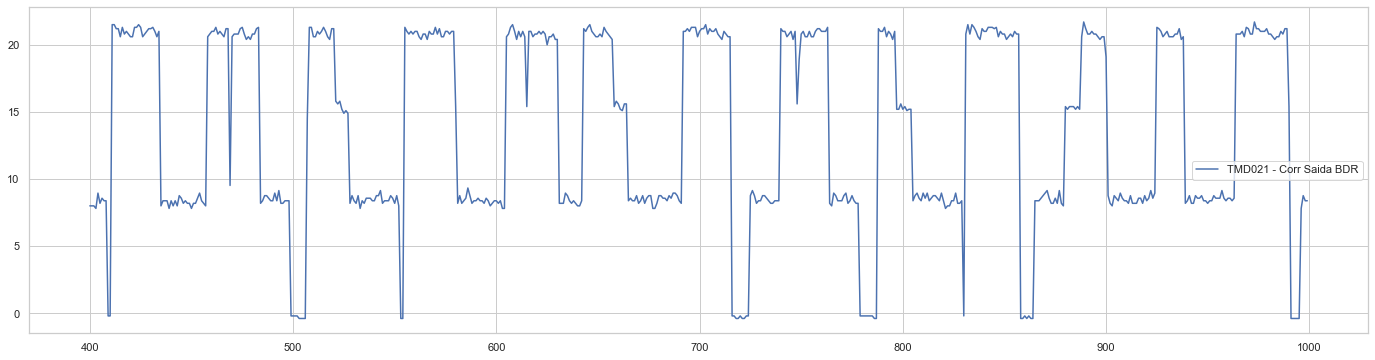

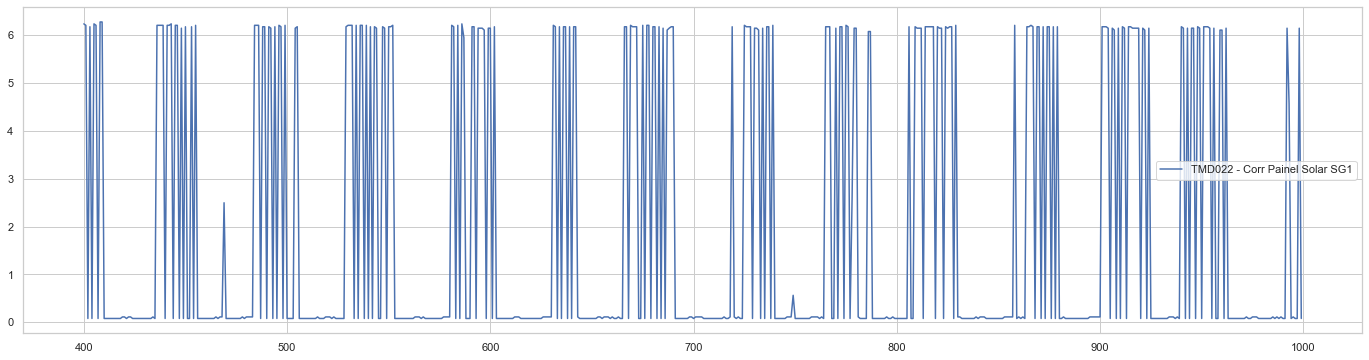

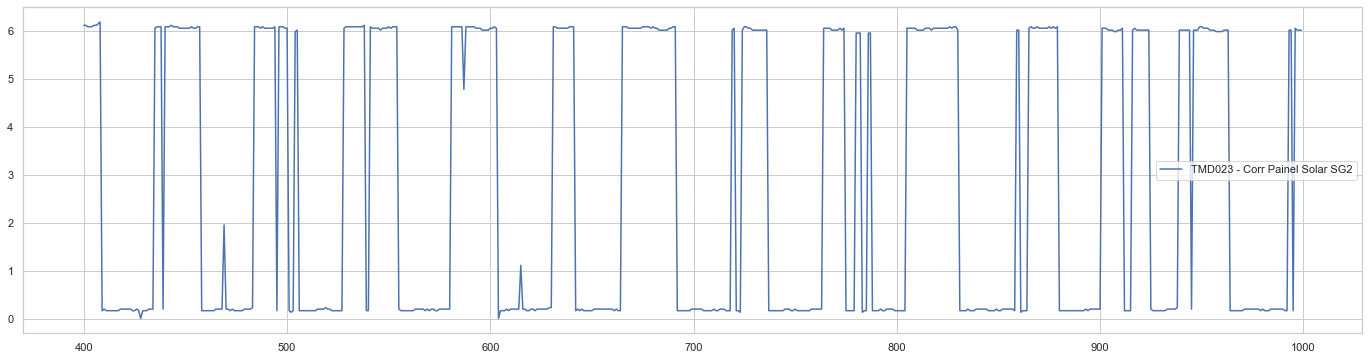

In [90]:
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 300:1000:1]["TMD001"], dashes=False, label = "TMD001 - Tensao Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 300:1000:1]["TMD002"], dashes=False, label = "TMD002 - Corr Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 300:1000:1]["TMD003"], dashes=False, label = "TMD003 - Tensao Saida MEAS")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD013"], dashes=False, label = "TMD013 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD017"], dashes=False, label = "TMD017 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD015"], dashes=False, label = "TMD015 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD019"], dashes=False, label = "TMD019 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD016"], dashes=False, label = "TMD016 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD020"], dashes=False, label = "TMD020 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD021"], dashes=False, label = "TMD021 - Corr Saida BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD022"], dashes=False, label = "TMD022 - Corr Painel Solar SG1")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

A analise exploratória de dados continua de maneira iterativa, na busca de extrair informações dos dados atravéz diferentes vizualizações destes. O grafico boxplot abaixo contendo todos os dados de telemetria, buscar desmonstrar a distribuição e os outliers dos dados de telemetria referentes a janela de tempo do mes de janeiro de 2000. É possivel observar uma maior quantidades de outliers nos sinais TMD015 e TMD016 referentes a temperatura das baterias e a tensão mínima de grupo de 3 células respectivamente

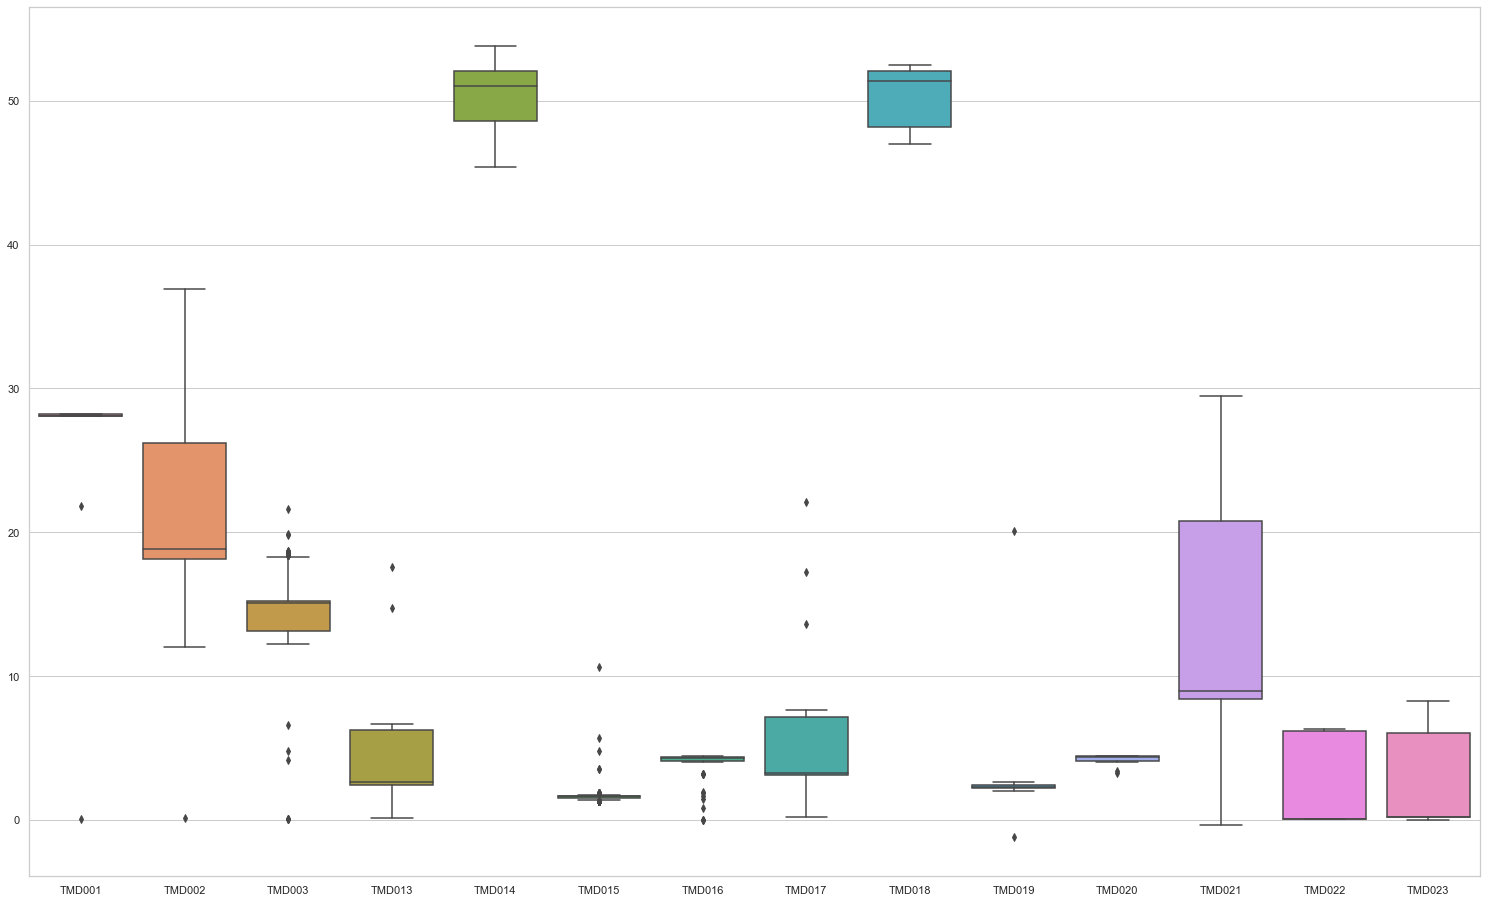

In [91]:
# Boxplot
plt.figure(figsize=(26, 16))
sns.boxplot(data=df)

Fazendo um plot apenas do sinal com maior dispersão de outliers, a TMD003 - Tensão de saida do MEAS, temos:

In [92]:
df

,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,28.2,18.8,13.00,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,28.1,18.1,13.20,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,28.1,18.3,13.00,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,28.1,12.4,13.10,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,28.1,13.1,18.50,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,28.2,26.4,15.20,2.530,51.3,1.64,4.31,3.180,52.1,2.42,4.42,8.770,6.0800,5.980
1306,28.2,26.4,15.20,2.530,52.5,1.64,4.41,3.180,52.2,2.42,4.42,8.390,0.0805,5.980
1307,28.1,26.2,15.20,2.440,51.5,1.64,4.39,3.100,52.3,2.31,4.42,8.580,0.0805,5.980
1308,28.1,26.2,15.20,2.350,51.8,1.64,4.33,3.100,52.3,2.42,4.42,8.580,6.1500,6.010


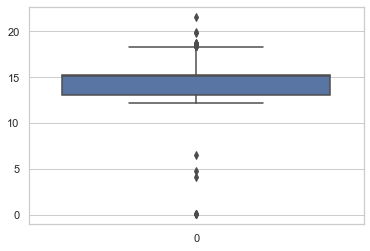

In [93]:
# Boxplot
plt.figure
sns.boxplot(data=df["TMD003"])


Embora a representação possa evidenciar algus outliers, assim como a dispersão e simetria dos dados, as informações obtidas a partir dessa analise são encipientes e inviabilizam a inferência sobre algo mais concreto. Até mesmo porque como os dados de telemetria em sua grande maioria representam valores não diretamente correlacionados, torna-se dificil avalia-los atraves deste boxplot. 
Ao nos depararmos com a situação de que a quantidade de dados utilizada para uma primeira analise não é o suficiente para inferirmos algo sobre os dados ou que não há mais conclusões a serem extraídas, e ainda restam perguntas a serem respondidas, ou ainda seja o caso como o deste trabalho, em que foram obtidas algumas informações de certa maneira relevantes mas que ainda não respondem as perguntas firmadas no início. 
Existe a possibilidade de que mais dados sejam analisados/adicionados a analise, ou até mesmo que a massa de dados não contenha a informação da qual buscamos.
Às vezes, são necessários mais dados para criar um contexto de onde você pode obter algumas informações. Essa é a parte do processo em que você volta para "Raw data is collected", e neste trabalho, até este ponto, apenas o referente a 1 mês de aquisição de dados havia sido analisado, porém, ainda dispúnhamos de mais dados para contribuir para esta exploração. Sendo assim, serão carregados os dados relativos as janelas de tempo de :

**Março de 2000(1 a 16);

**Janeiro de 2003;

**Março de 2003(1 a 16);

**Junho de 2003.

Esses novos dados serão utilizados de duas maneiras diferentes. A primeira será agrunpando-os afim de formar um série temporal que viabilizara a visualização da evolução dos dados ao longo do tempo. E um segunda abordagem que fará uma comparação entre algumas telemetrias com o uso da ferramenta boxsplot.

In [94]:
dfJa00 = df
dfMa00 = pd.read_csv('rawData/ANSAT/01mar2000_a_16mar2000_vi.csv')
dfJa03 = pd.read_csv('rawData/ANSAT/01jan2003_a_31jan2003_vi.csv')
dfMa03 = pd.read_csv('rawData/ANSAT/01mar2003_a_16mar2003_vi.csv')
dfJn03 = pd.read_csv('rawData/ANSAT/01jun2003_a_30jun2003_vi.csv')

In [95]:
dfJa00.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfMa00 = dfMa00[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfMa00 = dfMa00.drop(columns=['OBTIME'])
dfMa00.columns =  ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfJa03 = dfJa03[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfJa03 = dfJa03.drop(columns=['OBTIME'])
dfJa03.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfMa03 = dfMa03[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfMa03 = dfMa03.drop(columns=['OBTIME'])
dfMa03.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfJn03 = dfJn03[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfJn03 = dfJn03.drop(columns=['OBTIME'])
dfJn03.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]

### Nota:
Primeiramente, vamos tentar analizar a evolção dos dados de telemetria olhando para toda a janela temporal de aquisiçoes. Pois,  ainda que as aquiscições não tenham sido continuas, atraves delas poderemos verificar a existencia de alguma tendecia nos sinais.

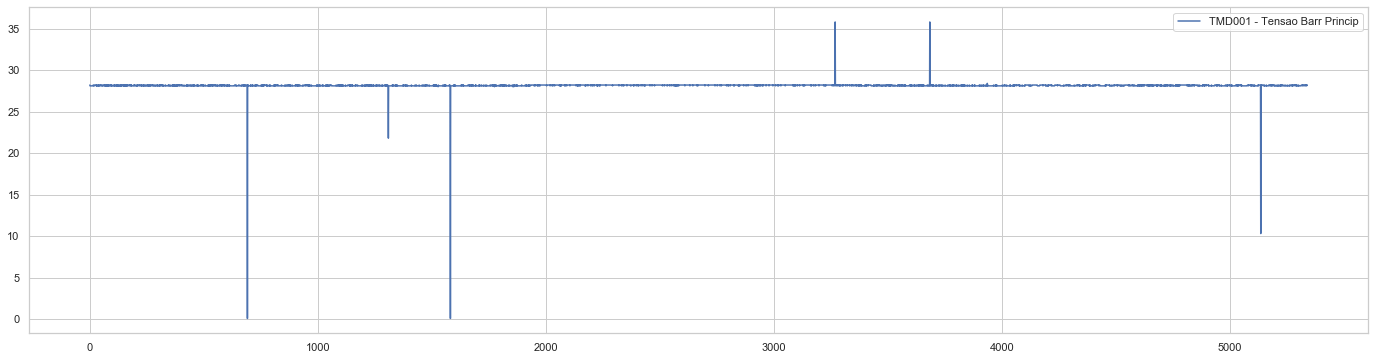

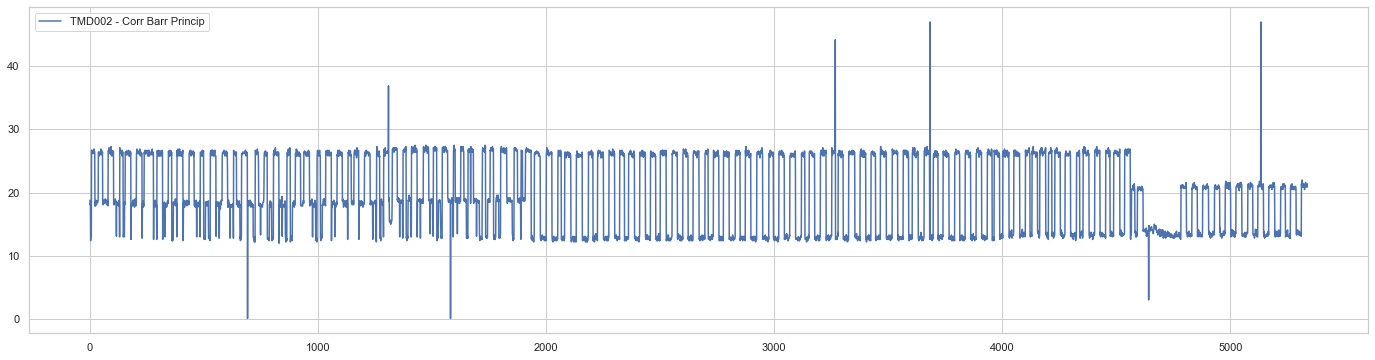

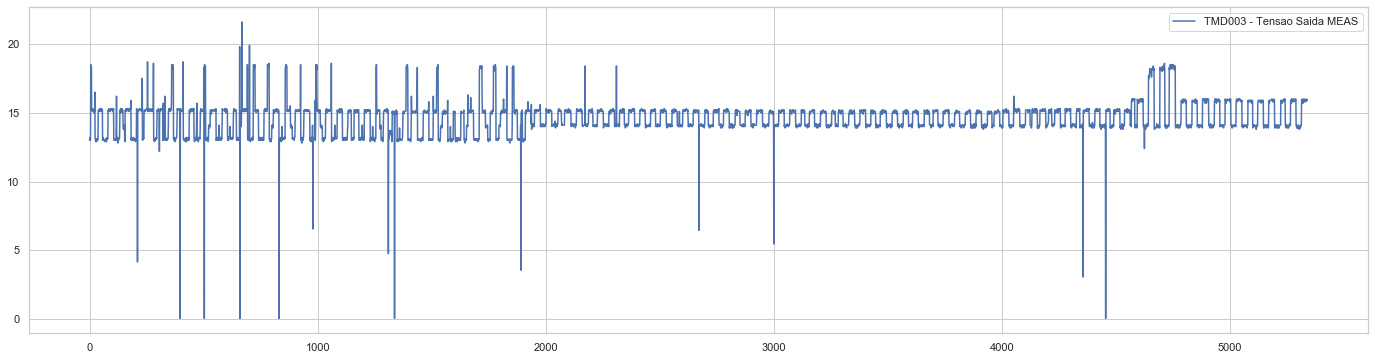

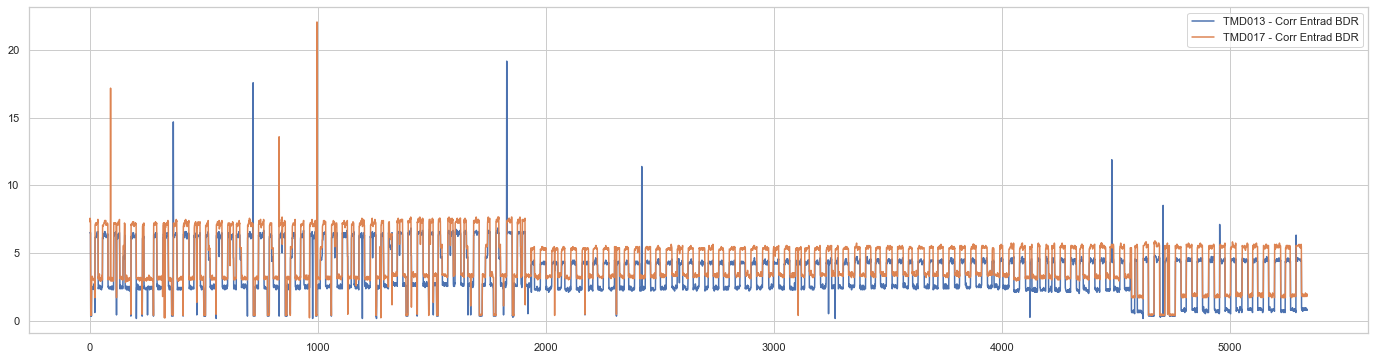

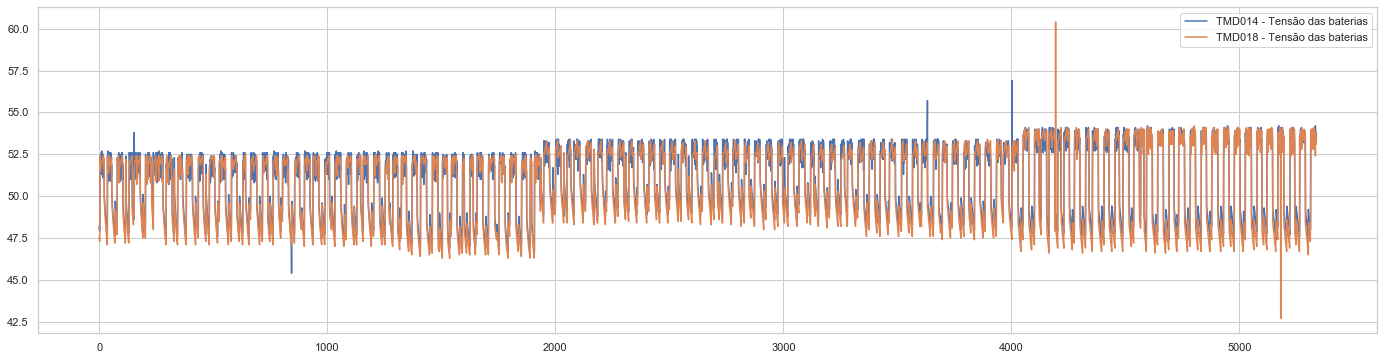

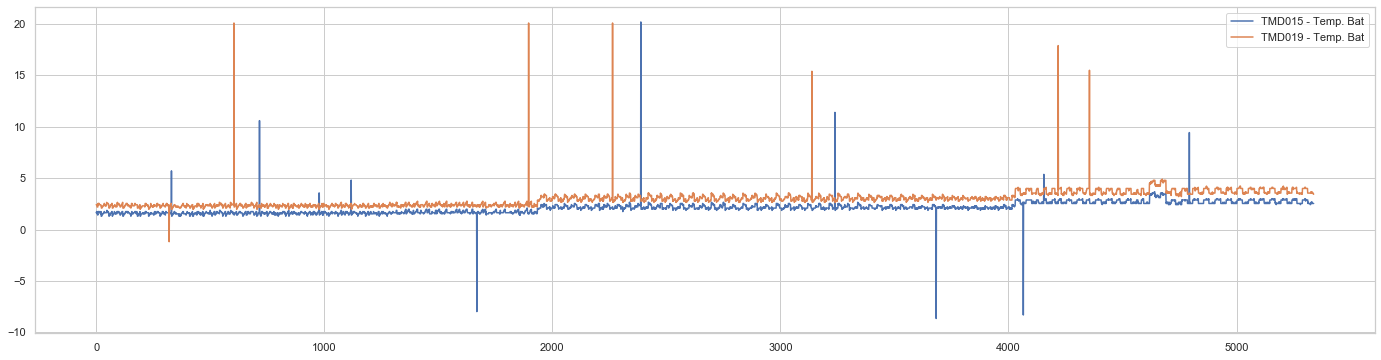

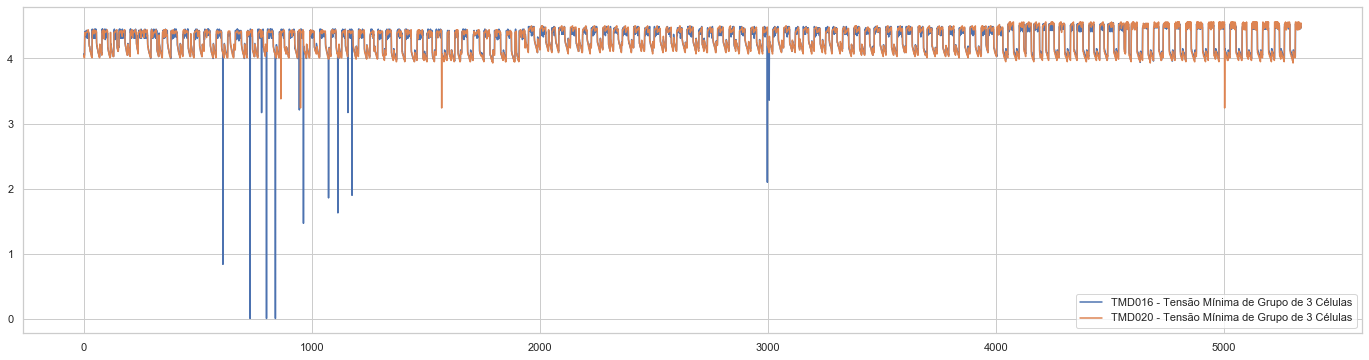

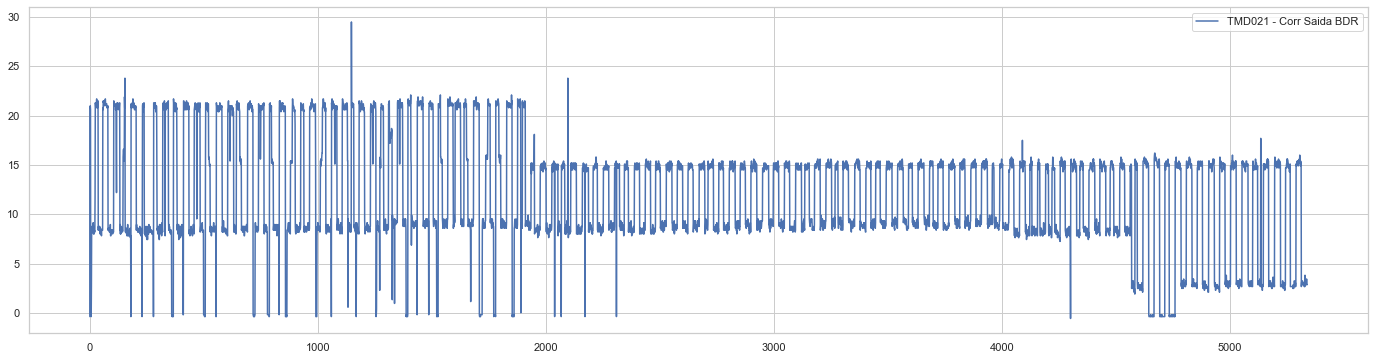

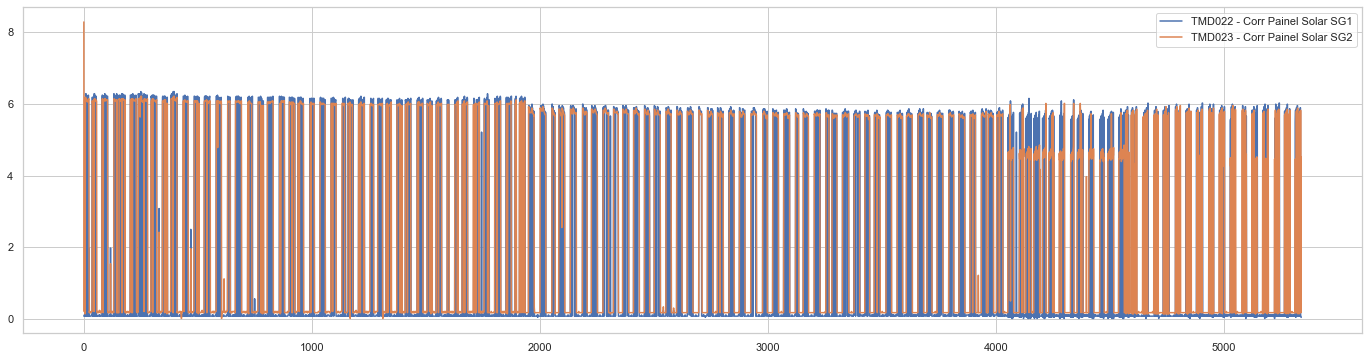

In [96]:
BigPicture = [dfJa00, dfMa00, dfJa03, dfMa03, dfJn03]
BigPicture = pd.concat(BigPicture)
BigPicture = BigPicture.reset_index()
BigPicture = BigPicture.drop(columns=['index'])
BigPicture
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD001 - Tensao Barr Princip"], dashes=False, label = "TMD001 - Tensao Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD002 - Corr Barr Princip"], dashes=False, label = "TMD002 - Corr Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD003 - Tensao Saida MEAS"], dashes=False, label = "TMD003 - Tensao Saida MEAS")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD013 - Corr Entrad BDR","TMD017 - Corr Entrad BDR"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD017"], dashes=False, label = "TMD017 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD014 - Tensão das baterias","TMD018 - Tensão das baterias"]], dashes=False)
##plt.figure(figsize=(24, 6))
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD015 - Temp. Bat","TMD019 - Temp. Bat"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD019"], dashes=False, label = "TMD019 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD016 - Tensão Mínima de Grupo de 3 Células","TMD020 - Tensão Mínima de Grupo de 3 Células"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD020"], dashes=False, label = "TMD020 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD021 - Corr Saida BDR"], dashes=False, label = "TMD021 - Corr Saida BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD022 - Corr Painel Solar SG1","TMD023 - Corr Painel Solar SG2"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

Ao concatenarmos os dados os dados referentes aos meses de Janeiro e Março de 2000 ao meses de Janeiro, Março e Junho de 2003 fomos capazes de visualizar um janela maior de dados que evidenciou um comportamento anômalo nos sinais de saída dos painéis solares, antes não percebido dado ao tamanho da janela de análise.
Nesse ultimo plot, temos as telemetrias TMD022 e TMD023, ambas representando niveis de correntes de saida dos painéis solares. O eixos desse grafico tem o seguinte significado:
- O eixo Y representa a corrente do painel solar e está em Amperes.
- O eixo X é o índice das observações.
Ao olharmos para a esse ultimo plot, onde a Corrente de saída de ambos painéis solares é plotada, o eixo Y representa a corrente do painel solar e está em Amperes, e o eixo X é o índice das observações. A partir deste plot podemos com base na informação fornecidas por especialista neste satélite, inferir que este comportamento anômalo se trata de uma degradação do painel solar, durante o passar do tempo, que reflete uma perda de corrente de saída deste. Acarretando menos quantidade de energia armazenada por período de carga durante visada do Sol. Ao  trabalharmos um pouco este plot, e diminuirmos um pouco a quantidade de amostras na janela de observação, olhando apenas o sinal TMD023, temos um resultado visto abaixo.

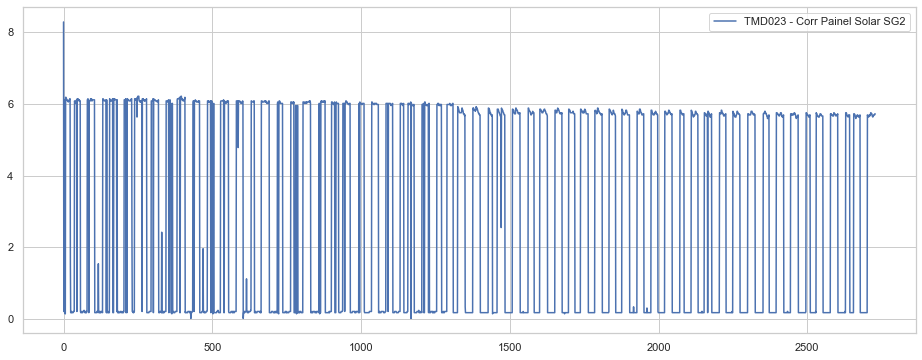

In [97]:
rawData2 = pd.read_csv('rawData/ANSAT/01jan2003_a_31jan2003_vi.csv')
TM023_00 = pd.DataFrame(rawData["TMD023"])
TM023_03 = pd.DataFrame(rawData2["TMD023"])
frames =[TM023_00 , TM023_03]
result = pd.concat(frames)
result = result.reset_index()
result = result.drop(columns=['index'])
result
plt.figure(figsize=(16, 6))
sns.lineplot(data=result["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

Esse gráfico de linha é uma quantidade equivalente de dois meses de dados, de 2 anos diferentes, concatenada para mostrar como o TMD0023 evoluiu dentro de um ano. Se você olhar para o gráfico, o primeiro mês de dados compreende o período entre 0 e 1000 observações, e o segundo mês do próximo ano compreende a partir desse ponto, apenas confirma o que foi afirmado anteriormente com apenas um mês de dados não possível ver a degradação do painel solar.

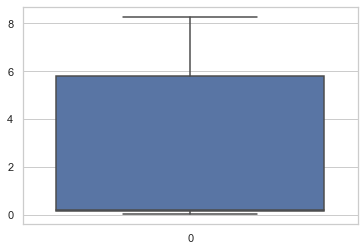

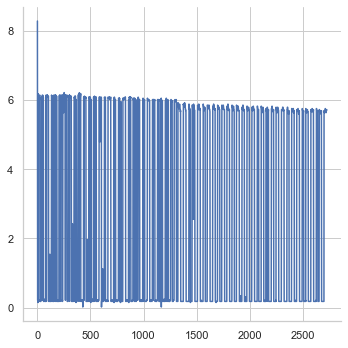

In [98]:
sns.boxplot(data=result['TMD023']); sns.relplot( hue="region", style="event",
            dashes=False, markers=True, kind="line", data=result['TMD023']);

O gráfico de linhas acima contém a mesma quantidade de dados vistos no grafico de linhas anteriormente avaliado, mas sua configuração de tamanho foi alterada, fazendo com que a anomalia tenha uma aparencia mais acentuada. Por outro lado, o boxplot visto no lado acima representa os mesmos dados visualizados do grafico de linhas em questão e não dá nenhum indicativo de anomalia com relação ao sinal. Na verdade, é possível ver que as distribuições de dados continuam de certa maneira adequadas. O objetivo aqui é demonstrar que mesmo quando você não possui nenhum outlier para determinado sinal, e todos os valores estão dentro do intervalo esperado, isso não significa que você não tenha nenhum problema com o sistema.

## 3. Conclusão
Este trabalho apresentou uma breve introdução a algumas ferramentas básicas de data science para análise de telemetrias funcionais que podem apoiar especialmente satélites maiores com muitos sinais telemetria deferentes. 
O fluxo de trabalho utilizado é tradicional para aplicações em data science, o qual inclui alguns pontos que devem ser destacados:

- (a) Equilibre seu esforço de forma eficaz;
- (b) Prepare seus dados;
- (c) Tente identificar os principais dados do seu estudo;
- (d) Espere obter mais dados brutos para desenvolver seu dataframe e seu trabalho;
- (e) Explore diferentes visualizações de dados;
- (f) Encontre mais dados brutos relacionados ao aprimoramento de seu modelo, e
- (g) procure bons algoritmos para detectar os fenômenos nos quais você está interessado.

O trabalho tinha como motivação responder a alguns questionamentos e com base no trabalho desenvolvido, foram possiveis obter as seguintes respostas.

**1 - Os valores tendem a algum comportamento padrão?**

- Como a massa de dados abrangem uma grande variedade de sinais de telemetria com diferentes significados, num primeiro momento, não há comportamento padrão coletivo observado. Entretando, ao diminuir o escopo de analise, focando em um conjunto de telemetrias que descreva um subsistema do satélite, como foi feito para o sistema de suprimento de energia, é possivel observar um comportamento derivado da movimentação do satelite em sua orbita.


**2 - Como essas telemtrias evoluem ao longo do tempo?**

- Como foi visto no final do trabalho, as telemetrias relacionadas a corrente de saido dos paineis solares evoluiram ao longo do tempo demonstrando uma degradação do funcionamento destes paineis. O que tende a ser um comportamento não só dos paines solares mas como também de baterias e outros componenetes. Certamente a avaliação de uma janela de tempo maior, poderia demonstrar o mesmo comportamento de degradação em outros sinais.


**3 - Existem outliers ou valores anômalos?**

- Sim existem outliers como foi observado no boxplot gerado a partir dos sinais das telemetrias do susbsistema de suprimento de energia. Entretando, a inferencia sobre a razão dos outliers ou até mesmo se esses são relevantes depende do apoio da avaliação de um especilista na operação deste satélite.


**4 - É possivel atraves da analise do comportamento das telemetrias, inferir de maneira aproximada o contexto do satélite?**

- Sim, como foi observado no subsistema de suprimento de energia, ss valos de corrente de saida dos painéis solares oscilavam de acordo com a periodo de visada ao sol ou eclipse. Sendo assim possivel ter uma noção grosseira do contexto do satélite.


**5 - É possível inferir alguma correlação entre as Telemetrias?**

- Até onde o trabalho foi desenvolvido, não foram geradas avaliações de correlação entre os sinais de telemetria, entretanto quando olhamos para os sinais TMD002 e TMD003, dado ao conhecimento de seus significados é possivel observar a correlação no consumo de corrente e o nivel de tensão. 


As etapas futuras serão mais aprofundadas para que um trabalho maior seja realizado usando técnicas de Inteligência Artificial para inferir proativamente se alguma parte do satélite pode ser degradada ou apresentar algum tipo de comportamento anômalo que pode levar a uma falha do subsistema ou até perda de missão.

## 4. Referências

[1] Azevedo, D. R., Ambrósio, A.M., Vieira, M., Applying Data Mining for Detecting Anomalies in Satellites, 9th European Dependable Computing Conference, 2012.

[2] SCHUTT, R. & O´NEIL, C., Doing Data Science, O'Reilly Media, Inc, 2013.

[3] ANACONDA, Solutions for Data Science Practitioners and Enterprise Machine Learning, retrieved in 30 September, 2019 from https://www.anaconda.com, 2019.

[4] VANDERPLAS, J. Python data science handbook, O'Reilly Media, Inc, 2016.

[5] WICKHAM, H. Tidy Data. Journal of Statistical Software, 59(10), 2014.

[6] TAFAZOLI, M., A study of on-orbit spacecraft failures. Acta Astronautica 64, p. 195–205, 2009.

[7] B. Robertson, E. Stokening, Satellite GN&C Anomaly Trends. In: AAS Guidance and Control Conference, 2003.

[8] V. Chandola, A. Banerjee & V. Kumar, Anomaly Detection: A Survey,ACM Computing Surveys, 2009.

[9] Wickham, Hadley (20 February 2013). "Tidy Data" (PDF). Journal of Statistical Software.